In [2]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [3]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    return (np.power(p-q,2).sum())**(1/2)
    

In [4]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    return _dist(p,q)<eps

In [5]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(0, n_points):
        if not i == point_id:
            if _eps_neighborhood(m[:,point_id], m[:,i], eps):
                seeds.append(i)
    return seeds

In [6]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id
            
        while len(seeds) > 0:
            current_point = seeds[0]
            results =_region_query(m, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if classifications[result_point] == UNCLASSIFIED or \
                       classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True
        

In [7]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for point_id in range(0, n_points):
        point = m[:,point_id]
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    return classifications

In [52]:
# test here
dataset_1 = pd.read_csv(r"C:\Users\ASUS\Desktop\hw2_dbscan\blobs.csv")[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()


In [53]:
eps=1.6
min_points=5
a=dbscan(m, eps, min_points)

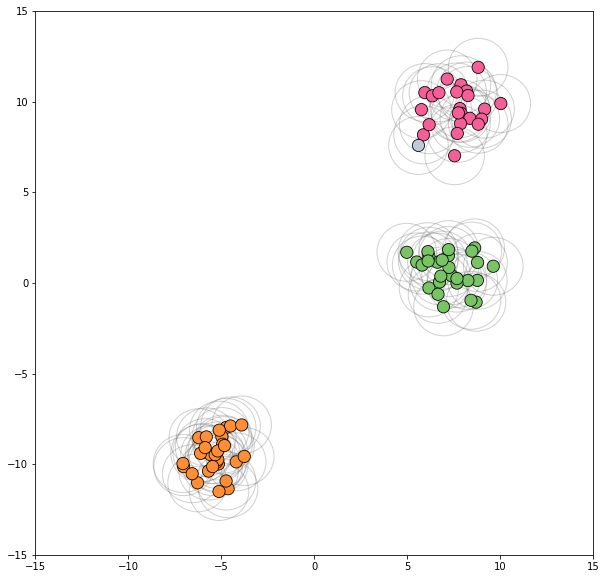

In [54]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [55]:
dataset_2 = pd.read_csv(r"C:\Users\ASUS\Desktop\hw2_dbscan\varied.csv")[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [56]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

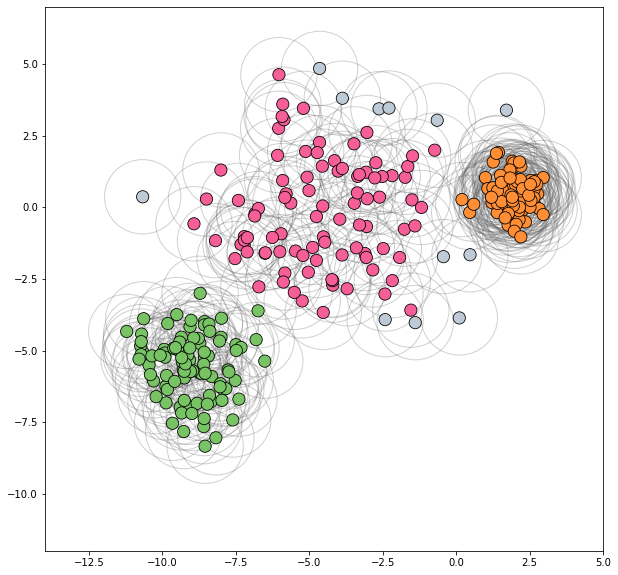

In [57]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
